Stock Prediction using Random Forest Regressor:
The Random Forest Regressor can be a powerful tool in a stock prediction project, particularly for forecasting stock prices based on historical trends and various market indicators.

Learning Historical Price Patterns
Handling Market Complexity & Non-Linearity
Robust Predictions via Ensemble Learning
Data Preprocessing & Scaling


Limitations :

- Time-Series Considerations: Random Forest does not inherently account for sequential dependencies, which are crucial in stock prediction

- Feature Engineering: Including factors like moving averages, RSI, and MACD could improve model accuracy.

- Hyperparameter Tuning: Optimizing n_estimators, max_depth, and min_samples_split can improve prediction stability.


1. Installing YFinance Library which will be used in this project as the Data Set

In [ ]:
!pip install yfinance --quiet

2. Importing necessary Libraries

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

3. Here we are fetching the historical stock data for Apple Inc using yfinance Library(5 years of stock data)

In [ ]:
ticker="AAPL"
data=yf.download(ticker, period='5y')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


4. We are preparing our dataset for stock price prediction.

We are creating a Target variable as it will save the closing price of the stock and dropping the null Data.

This step is also called the cleaning and preparing of the dataset

In [ ]:
data['Target']=data['Close'].shift(-1)
data = data.dropna()

5. Here we are selecting Features(x) and Target Variable(y) for training stock prediction model.

While chosing the feature, we have selected five key stock market attributes:
  - Open : Price at market open
  - High : Highest price reached during the day
  - Low : Lowest price during the day
  - Close : Price at market close
  - Volume : Number of shares traded

And on (y), We have selected Target which represents next day's closing price.

By predicting the target or (y), our model learns historical patterns and attempts to forecast future stock movements.

In [ ]:
x= data[['Open','High', 'Low','Close', 'Volume']]
y=data['Target']

6. Here we4 are splitting the dataset in training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

7. Here we are applying Min Max Scaling to our training and testing data ensuring that all feature values are normalized between 0 and 1.

In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

8. Here we initialize and train Random Forest Regressor on your scaled stock market data.

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)

RandomForestRegressor(random_state=42)

9. Here we are creating visual comaprison between actual and predicted stock prices using Matplotlib

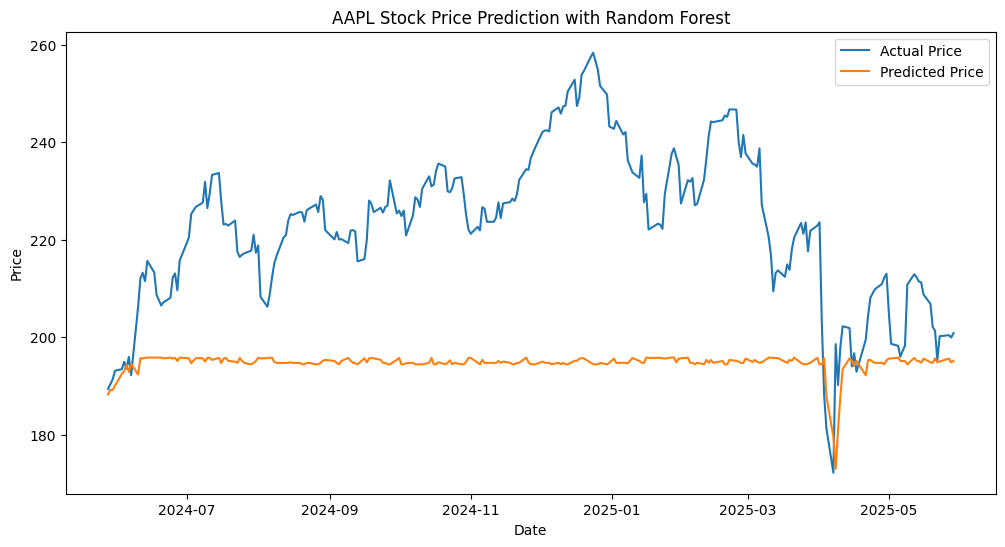

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"{ticker} Stock Price Prediction with Random Forest")
plt.legend()
plt.show()

10. Here we used different Metrics to check the accuracy.

In [ ]:
y_pred = rf_model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)


r2= r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error(RMSE): {rmse:.4f}")
print(f"Mean Absolute Error(MAE):{mae:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 1011.0997
Root Mean Squared Error(RMSE): 31.7978
Mean Absolute Error(MAE):28.2796
R-squared: -3.1701


# Conclusion

### MAE and RMSE

- On average the predictions are off by:
  - ~28.7 (MAE)
  - ~31.86 (RMSE) dollors
- These are relatively large errors for stock price prediction (especially if the stock is priced below $200- $300).

### R2 Scorer = -3.2025

- This is a very poor score.
- R2 < 0 means the model performs worse than simply predicting the average of the target variable fore every input.
- Indicates the model is not learning useful patterns -- it might be overfitting, underfitting, or the features are not inforemative.

### Question : Why we have not used a simple **percentage** to check the accuracy of the model above ?

#### Answer : The reason is simple because unlike classification task where **"Accuracy"** is straight forward like (95%) or something like that, in **Regression** problems we usually don't talk about the accuracy in percentage as here we are talking about the **continuous** values (in this case it is the stock price) and not the classes.